In [185]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

# import data
# data URL: https://catalog.data.gov/dataset/accidental-drug-related-deaths-2012-2018
# Public Access: This dataset is intended for public access and use
# Publisher: data.ct.gov
data = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2020.csv")
data.head()

,ID,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Death City,...,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid,Manner of Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,12-0187,7/17/2012,DateofDeath,34.0,Female,White,MAHOPAC,PUTNAM,NaN,DANBURY,...,NaN,NaN,NaN,Duster,NaN,NaN,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"CT\n(41.575155, -72.738288)"
1,12-0258,10/1/2012,DateofDeath,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\n(41.581345, -72.634112)","PORTLAND, CT\n(41.581345, -72.634112)","CT\n(41.575155, -72.738288)"
2,13-0146,4/28/2013,DateofDeath,28.0,Male,White,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
3,14-0150,4/6/2014,DateofDeath,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\n(41.812186, -73.101552)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)"
4,14-0183,4/27/2014,DateofDeath,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\n(41.355167, -72.099561)","NEW LONDON, CT\n(41.355167, -72.099561)","CT\n(41.575155, -72.738288)"


In [186]:
# drop redundant variables
# set format of Date column to month, day, year, source: https://www.kite.com/python/answers/how-to-change-the-pandas-datetime-format-in-python#:~:text=Call%20dataframe%5Bcolumn%5D%20.,%25y%22%20for%20the%20year
data = data.drop(columns=['Residence City', 'Residence County', 'Residence State', 'Death City', 'Death County', 'Location', 'Location if Other', 'Injury City', 'Injury County', 'Injury State', 'Manner of Death', 'DeathCityGeo', 'ResidenceCityGeo', 'InjuryCityGeo'])
data.head()

,ID,Date,Date Type,Age,Sex,Race,Description of Injury,Injury Place,Cause of Death,Other Significant Conditions,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid
0,12-0187,7/17/2012,DateofDeath,34.0,Female,White,Huffed Propellant,Other,"1,1-Difluoroethane Toxicity",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Duster,NaN,NaN
1,12-0258,10/1/2012,DateofDeath,51.0,Male,White,Injection,Residence,Heroin Toxicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13-0146,4/28/2013,DateofDeath,28.0,Male,White,Substance Abuse,Other,Acute Heroin Toxicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14-0150,4/6/2014,DateofDeath,46.0,Male,White,Injection,Other,Heroin and Cocaine Intoxication,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14-0183,4/27/2014,DateofDeath,52.0,Male,White,Substance Abuse,Unknown,Acute Heroin Intoxication,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# overall dataset description
print("There are", len(data), "rows in the dataset and", len(data.columns), "variables.")

# set type of variable of Date column to Date
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtype

There are 7679 rows in the dataset and 28 variables.


dtype('<M8[ns]')

<AxesSubplot:xlabel='Age', ylabel='Count'>

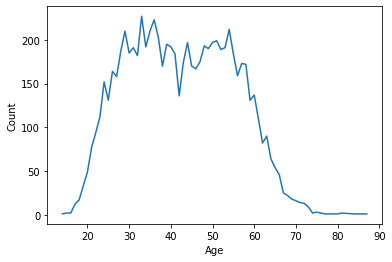

In [188]:
# finding relationship between age and accidental drug-caused death
ages = data.groupby('Age')['ID'].count().reset_index()
age_plt = sns.lineplot(data=ages, x='Age', y='ID')
age_plt.set(ylabel='Count')
age_plt

<AxesSubplot:xlabel='Age', ylabel='Count'>

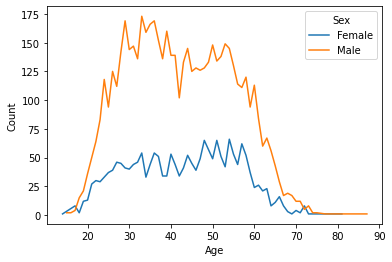

In [189]:
# find relationship between age and accidental drug-caused death by gender
age_gender = data.groupby(['Sex', 'Age'])['ID'].count().reset_index()
age_gender = age_gender[age_gender.Sex != 'Unknown']
age_gender_plt = sns.lineplot(data=age_gender, x='Age', y='ID', hue='Sex')
age_gender_plt.set(ylabel='Count')
age_gender_plt

Text(0, 0.5, 'Count (Death)')

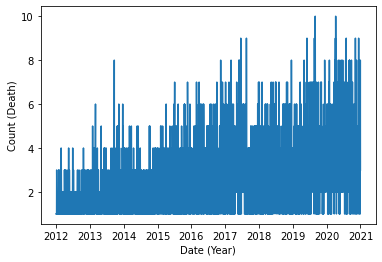

In [190]:
# plotting the number of cases by time
# note that distplot does not work well with datetime formats, hence a lineplot is used
dates = data.groupby('Date')['ID'].count().reset_index()
dates.head(10)
date_case_plt = sns.lineplot(x='Date', y='ID', data=dates)
date_case_plt.set_xlabel("Date (Year)")
date_case_plt.set_ylabel("Count (Death)")

In [191]:
# missing value analysis
# clean dataset - NaN values in type of drug columns are to be interpreted as 'N' for No and not missing
# only keep NaN if all entries in row for columns in type_of_drug is NaN
type_of_drug = data[["Heroin", "Cocaine", "Fentanyl", "Fentanyl Analogue", "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone",	"Benzodiazepine", "Methadone", "Amphet", "Tramad", "Morphine (Not Heroin)", "Hydromorphone", "Xylazine", "Other", "Opiate NOS",	"Any Opioid"]]
row = 0
col_num = len(type_of_drug.columns)

while row < len(type_of_drug):
    num_nan = type_of_drug.iloc[row].isna().sum()
    if num_nan != col_num: type_of_drug.iloc[row].fillna("N", inplace=True)
    row += 1

type_of_drug.head()

,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid
0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Duster,N,N
1,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [192]:
# updating data with type_of_drug
data[["Heroin", "Cocaine", "Fentanyl", "Fentanyl Analogue", "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone",	"Benzodiazepine", "Methadone", "Amphet", "Tramad", "Morphine (Not Heroin)", "Hydromorphone", "Xylazine", "Other", "Opiate NOS",	"Any Opioid"]] = type_of_drug
data.head()

,ID,Date,Date Type,Age,Sex,Race,Description of Injury,Injury Place,Cause of Death,Other Significant Conditions,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid
0,12-0187,2012-07-17,DateofDeath,34.0,Female,White,Huffed Propellant,Other,"1,1-Difluoroethane Toxicity",NaN,...,N,N,N,N,N,N,N,Duster,N,N
1,12-0258,2012-10-01,DateofDeath,51.0,Male,White,Injection,Residence,Heroin Toxicity,NaN,...,N,N,N,N,N,N,N,N,N,N
2,13-0146,2013-04-28,DateofDeath,28.0,Male,White,Substance Abuse,Other,Acute Heroin Toxicity,NaN,...,N,N,N,N,N,N,N,N,N,N
3,14-0150,2014-04-06,DateofDeath,46.0,Male,White,Injection,Other,Heroin and Cocaine Intoxication,NaN,...,N,N,N,N,N,N,N,N,N,N
4,14-0183,2014-04-27,DateofDeath,52.0,Male,White,Substance Abuse,Unknown,Acute Heroin Intoxication,NaN,...,N,N,N,N,N,N,N,N,N,N


In [193]:
# count missing values and the proportion of each column that is missing
nan_dict = {}
cols = data.columns
for col in cols:
    nan_dict[col] = [data[col].isna().sum(), round(data[col].isna().sum()/len(data[col]), 3)]
nan_dict

{'ID': [0, 0.0],
 'Date': [2, 0.0],
 'Date Type': [2, 0.0],
 'Age': [3, 0.0],
 'Sex': [11, 0.001],
 'Race': [23, 0.003],
 'Description of Injury': [789, 0.103],
 'Injury Place': [79, 0.01],
 'Cause of Death': [0, 0.0],
 'Other Significant Conditions ': [7083, 0.922],
 'Heroin': [35, 0.005],
 'Cocaine': [35, 0.005],
 'Fentanyl': [35, 0.005],
 'Fentanyl Analogue': [35, 0.005],
 'Oxycodone': [35, 0.005],
 'Oxymorphone': [35, 0.005],
 'Ethanol': [35, 0.005],
 'Hydrocodone': [35, 0.005],
 'Benzodiazepine': [35, 0.005],
 'Methadone': [35, 0.005],
 'Amphet': [35, 0.005],
 'Tramad': [35, 0.005],
 'Morphine (Not Heroin)': [35, 0.005],
 'Hydromorphone': [35, 0.005],
 'Xylazine': [35, 0.005],
 'Other': [35, 0.005],
 'Opiate NOS': [35, 0.005],
 'Any Opioid': [35, 0.005]}

In [194]:
nan_df = pd.DataFrame.from_dict(nan_dict, orient='index', columns=['# Missing', 'Proportion of Column Data Missing']).reset_index()
nan_df.head(10)

,index,# Missing,Proportion of Column Data Missing
0,ID,0,0.000
1,Date,2,0.000
2,Date Type,2,0.000
3,Age,3,0.000
4,Sex,11,0.001
5,Race,23,0.003
6,Description of Injury,789,0.103
7,Injury Place,79,0.010
8,Cause of Death,0,0.000
9,Other Significant Conditions,7083,0.922


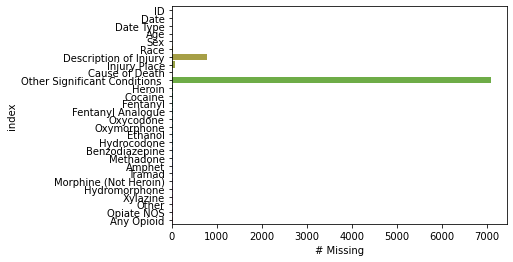

In [195]:
# plot missing values graph by crude number
missing_crude_plt = sns.barplot(data=nan_df, x='# Missing', y='index')

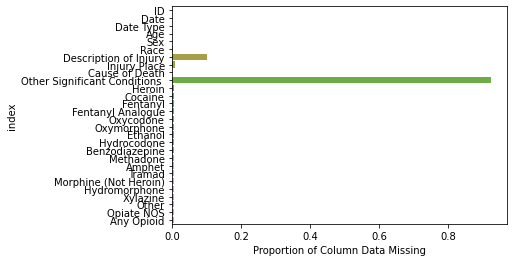

In [196]:
# plot missing values graph by proportion of total column entries
missing_prop_plt = sns.barplot(data=nan_df, x='Proportion of Column Data Missing', y='index')


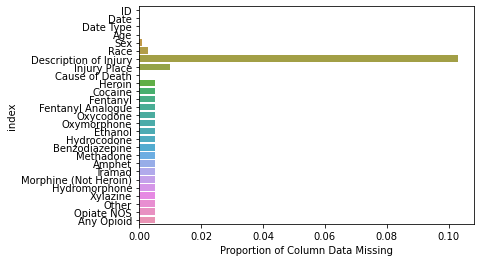

In [197]:
# obtain more detailed view on previous graph by removing the other significant conditions column
missing_prop_mag_plt = sns.barplot(data=nan_df.drop([9]), x='Proportion of Column Data Missing', y='index')

In [204]:
# examining potential associations between description of injury and other variables
injury_assoc = data[data['Description of Injury'].isna()]
IA_age_gb = injury_assoc.groupby('Age')['ID'].count()
IA_age_gb.head(100)

Age
17.0     2
18.0     3
19.0     5
20.0     6
21.0    13
22.0     7
23.0    15
24.0    16
25.0    18
26.0    22
27.0    13
28.0    25
29.0    20
30.0    17
31.0    15
32.0    16
33.0    22
34.0    14
35.0    24
36.0    19
37.0    16
38.0    22
39.0    25
40.0    13
41.0    11
42.0    12
43.0    18
44.0    12
45.0    19
46.0    18
47.0    16
48.0    18
49.0    25
50.0    22
51.0    27
52.0    18
53.0    21
54.0    18
55.0    32
56.0    18
57.0    14
58.0    17
59.0    19
60.0    12
61.0     4
62.0    12
63.0     8
64.0     3
65.0     5
66.0     2
67.0     2
68.0     3
69.0     2
70.0     2
71.0     3
72.0     5
73.0     1
Name: ID, dtype: int64

In [199]:
IA_sex_gb = injury_assoc.groupby('Sex')['ID'].count()
IA_sex_gb

Sex
Female    214
Male      573
Name: ID, dtype: int64

In [200]:
IA_race_gb = injury_assoc.groupby('Race')['ID'].count()
IA_race_gb

Race
Asian, Other         2
Black               56
Chinese              1
Hispanic, Black      3
Hispanic, White     84
Other                3
Unknown              3
White              635
Name: ID, dtype: int64

In [201]:
IA_date_gb = injury_assoc.groupby('Date')['ID'].count()
IA_date_gb = IA_date_gb.sort_values(ascending=False)
IA_date_gb.head(50)

Date
2015-11-21    7
2015-07-05    7
2015-10-18    6
2015-04-04    6
2015-12-17    6
2015-06-28    6
2015-10-21    6
2015-08-12    6
2015-06-09    5
2015-07-26    5
2015-09-18    5
2015-10-23    5
2015-02-09    5
2015-11-01    5
2015-06-22    5
2015-05-14    5
2015-07-08    5
2015-11-04    5
2015-02-04    5
2015-07-12    5
2015-07-31    5
2015-02-25    5
2015-11-14    4
2015-06-30    4
2015-11-13    4
2015-06-24    4
2015-11-17    4
2015-11-19    4
2015-02-27    4
2015-06-13    4
2015-06-02    4
2015-05-31    4
2015-05-26    4
2015-03-17    4
2015-11-23    4
2015-11-24    4
2015-05-09    4
2015-03-27    4
2015-11-27    4
2015-03-29    4
2015-11-30    4
2015-04-25    4
2015-04-12    4
2015-01-30    4
2015-07-11    4
2015-01-07    4
2015-10-03    4
2015-09-19    4
2015-09-20    4
2015-09-24    4
Name: ID, dtype: int64

In [202]:
IA_date_gb.head(100)

Date
2015-11-21    7
2015-07-05    7
2015-10-18    6
2015-04-04    6
2015-12-17    6
             ..
2015-11-18    3
2015-06-19    3
2015-06-16    3
2015-06-14    3
2015-10-26    3
Name: ID, Length: 100, dtype: int64

In [203]:
IA_date_gb.head(500)

Date
2015-11-21    7
2015-07-05    7
2015-10-18    6
2015-04-04    6
2015-12-17    6
             ..
2015-07-01    1
2015-07-06    1
2015-07-10    1
2012-10-29    1
2020-12-20    1
Name: ID, Length: 349, dtype: int64